In [1]:
#include necessary modules
import numpy as np
import math
from matplotlib import pyplot as plt

In [2]:
def getData(fileName):
    params = []
    target = []
    with open(fileName, 'r') as dataFile:
        dataLines = dataFile.readlines()

    for dataLine in dataLines:
        tempData = dataLine.split(' ')
        data = []
        dataLineCount = len(tempData)
        val = dataLineCount-1
        for i in range(val):
            data.append(float(tempData[i]))
        params.append(data)
        target.append(float(tempData[dataLineCount-1].strip('\n')))
    return [params, target] #print(data)

[[-0.999, -0.068], [-0.998, 0.073], [-0.995, -0.051], [-0.994, -0.676], [-0.992, -0.124], [-0.985, -0.544], [-0.983, -0.76], [-0.982, -0.783], [-0.982, 0.074], [-0.977, -0.451], [-0.976, 0.485], [-0.974, -0.542], [-0.974, -0.218], [-0.973, -0.112], [-0.969, -0.182], [-0.969, -0.172], [-0.964, -0.983], [-0.964, 0.05], [-0.963, 0.197], [-0.963, 0.801], [-0.962, -0.897], [-0.961, 0.655], [-0.961, 0.906], [-0.96, -0.046], [-0.96, 0.772], [-0.957, -0.906], [-0.957, -0.753], [-0.956, -0.955], [-0.953, -0.358], [-0.953, 0.41], [-0.951, 0.731], [-0.95, -0.655], [-0.95, -0.133], [-0.95, 0.56], [-0.949, 0.682], [-0.948, 0.029], [-0.947, 0.392], [-0.945, -0.265], [-0.941, 0.987], [-0.939, -0.714], [-0.939, -0.636], [-0.937, -0.583], [-0.937, -0.267], [-0.937, -0.125], [-0.937, -0.094], [-0.935, -0.276], [-0.93, 0.527], [-0.927, 0.496], [-0.926, -0.076], [-0.925, -0.299], [-0.921, 0.886], [-0.919, 0.295], [-0.918, -0.527], [-0.917, 0.371], [-0.916, -0.33], [-0.916, -0.015], [-0.914, 0.775], [-0.91

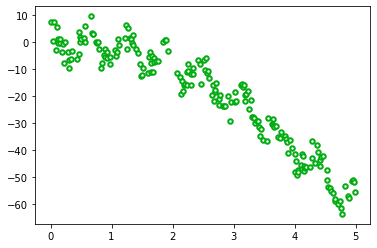

In [3]:
#reading all the data from the files
trainData_1d = getData('1d_team_36_train.txt')
trainData_2d = getData('2d_team_36_train.txt')
devData_1d = getData('1d_team_36_dev.txt')
devData_2d = getData('2d_team_36_dev.txt')
print(trainData_2d[0])
plt.scatter(trainData_1d[0], trainData_1d[1], c="white", linewidths=2, edgecolor="#03AC13", s=20)
#plt.scatter(devData_1d[0], devData_1d[1], c="white", linewidths=2, edgecolor="red", s=20) #developement data plot

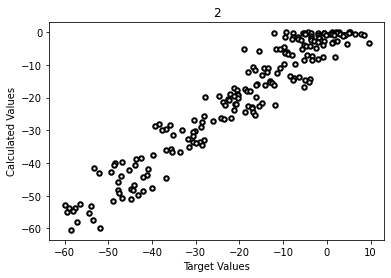

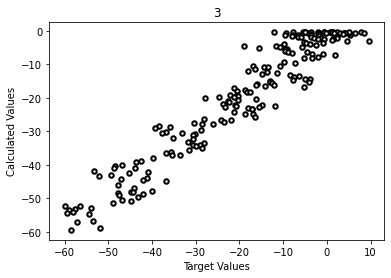

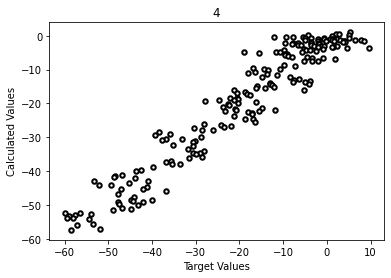

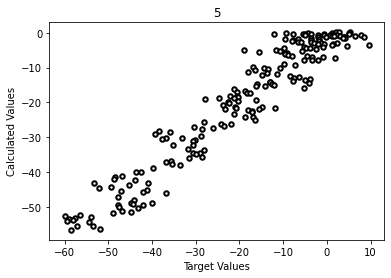

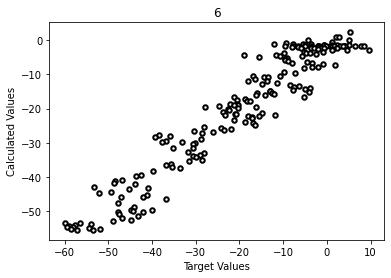

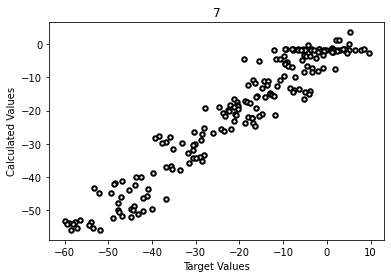

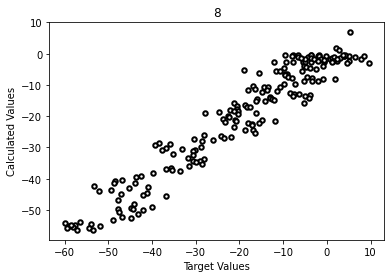

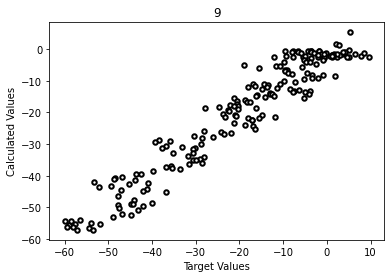

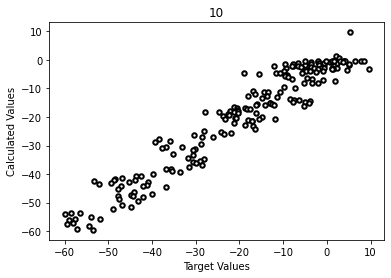

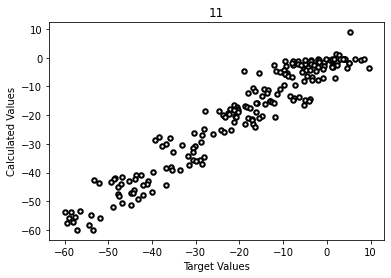

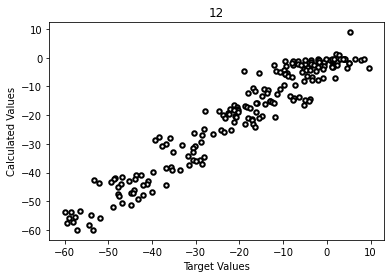

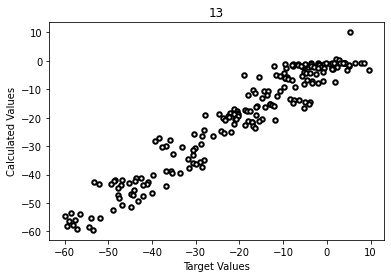

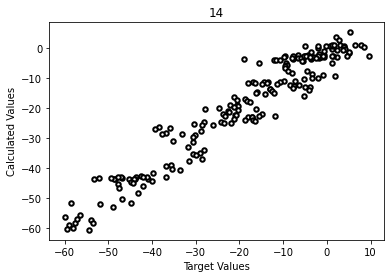

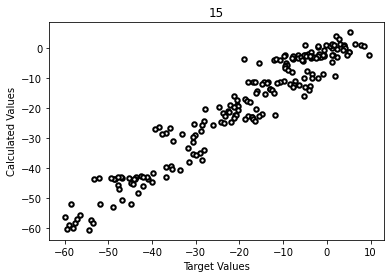

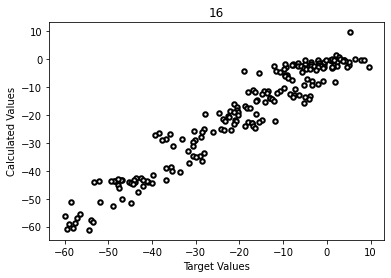

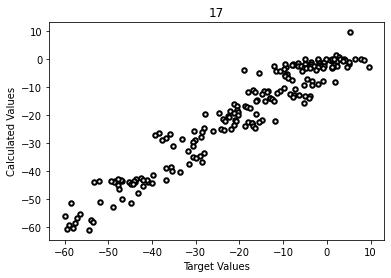

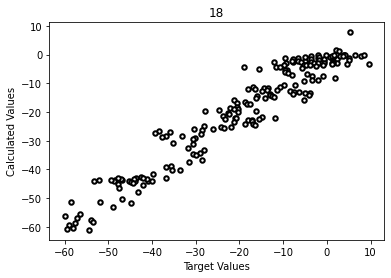

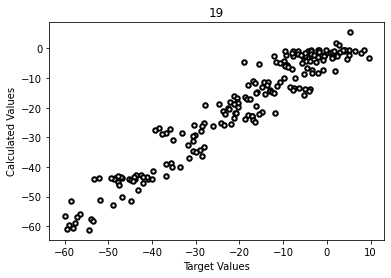

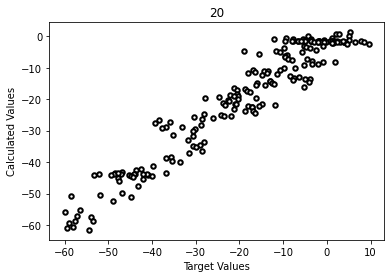

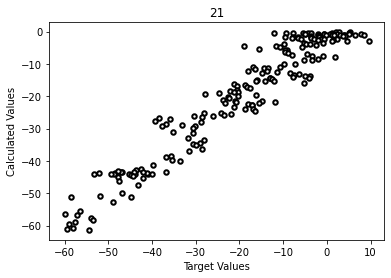

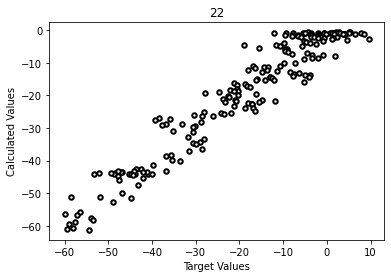

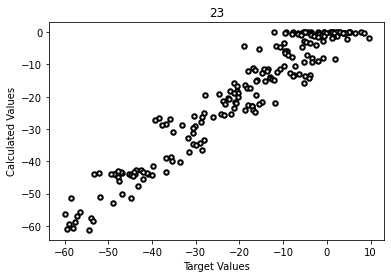

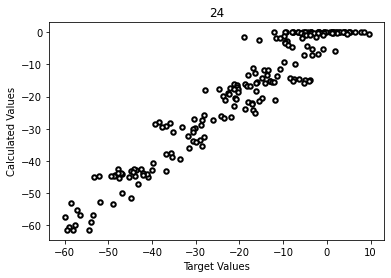

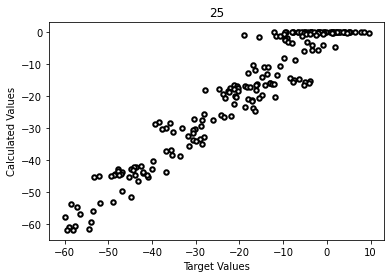

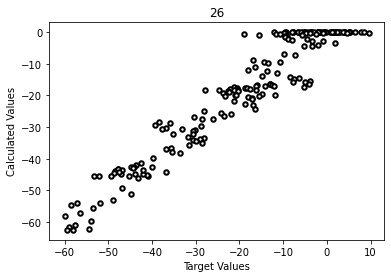

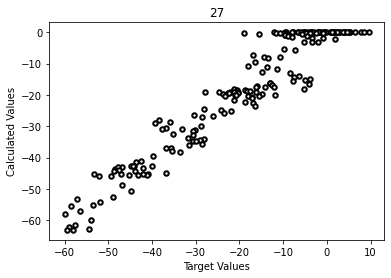

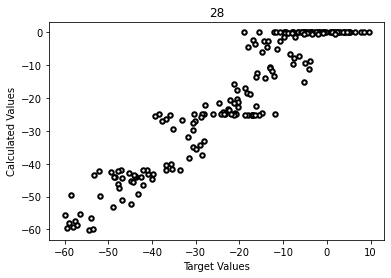

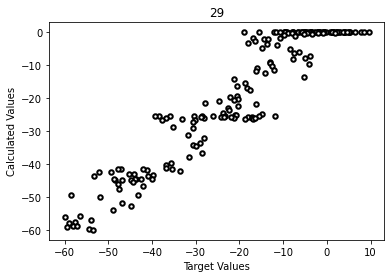

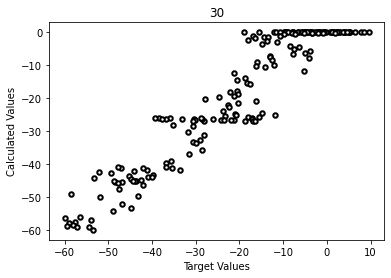

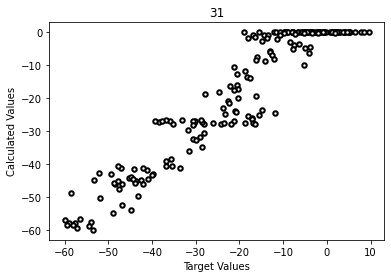

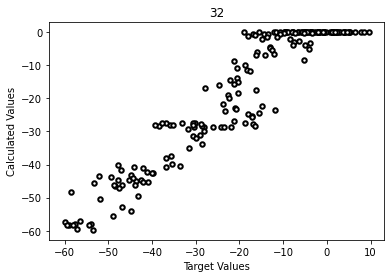

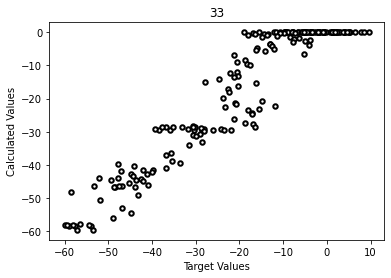

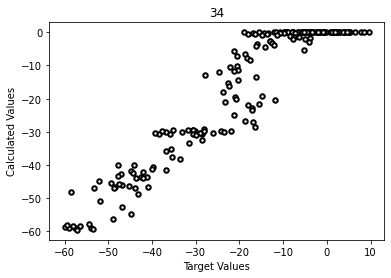

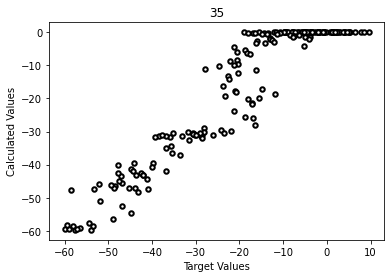

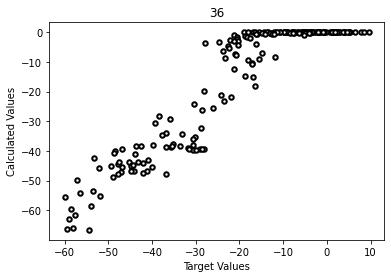

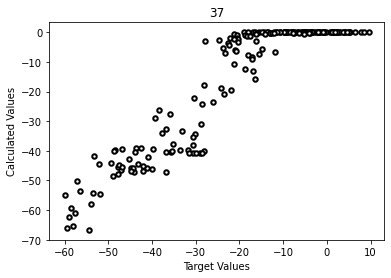

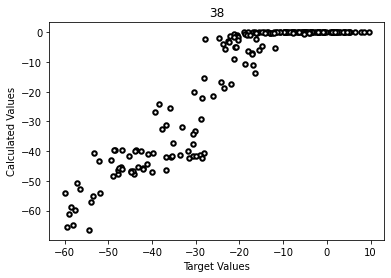

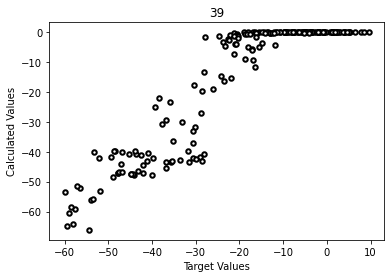

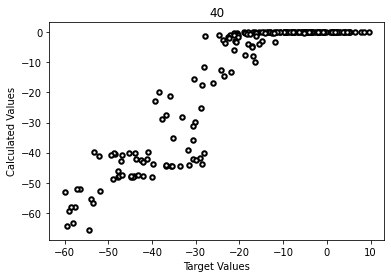

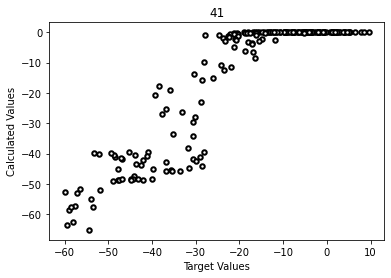

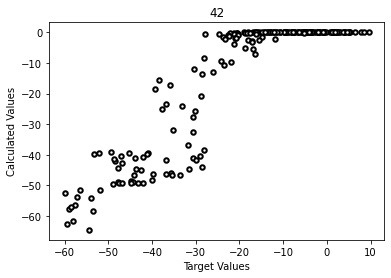

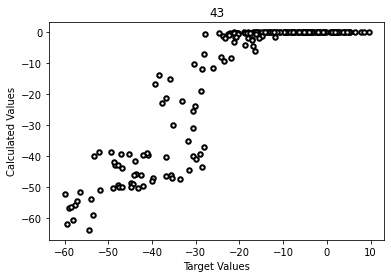

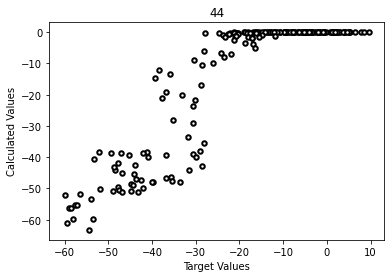

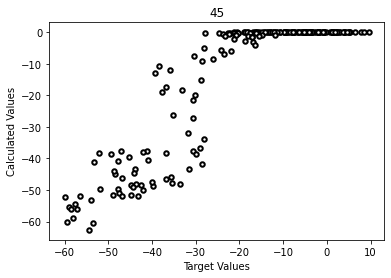

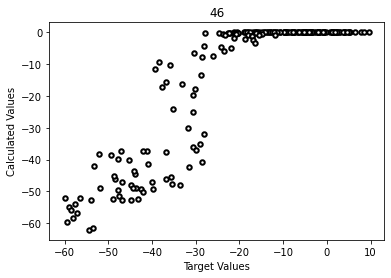

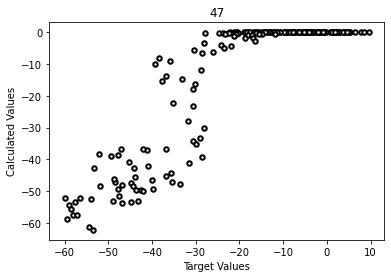

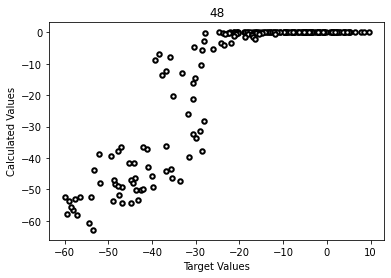

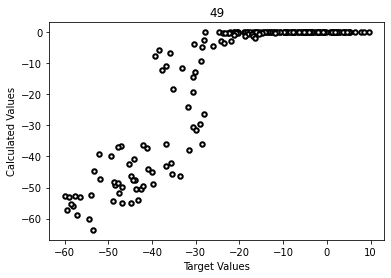

Text(0, 0.5, 'Frobenius Norm for 200 data points')

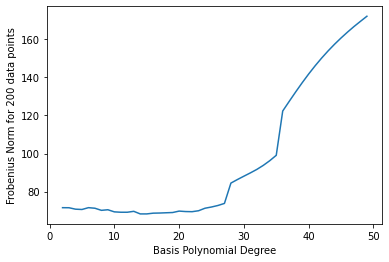

In [4]:
#leastSquared linear regression for 1d data.
frobVals = []
for basisPolDegree in range(2, 50):
    x = []
    for [elem] in trainData_1d[0]:
        rowData = []
        power = 0 
        prod = 1
        while (power<=basisPolDegree):
            rowData.append(prod)
            prod = prod*elem
            power+=1
        x.append(np.array(rowData))
    x = np.array(x)
    w = np.linalg.pinv(x)@(np.array(trainData_1d[1]))
    calcVals = x@w
    
    y = []
    for [elem] in devData_1d[0]:
        rowData = []
        power = 0 
        prod = 1
        while (power<=basisPolDegree):
            rowData.append(prod)
            prod = prod*elem
            power+=1
        y.append(np.array(rowData))
    y = np.array(y)
    calcVals_dev = y@w
    
    tempFrobVal_train = np.linalg.norm((np.array(trainData_1d[1])-calcVals))
    tempFrobVal_dev = np.linalg.norm((np.array(devData_1d[1])-calcVals_dev))
    
    frobVals.append(tempFrobVal_dev)
    plt.plot(trainData_1d[0], calcVals)
    plt.title(str(basisPolDegree))
    plt.scatter(trainData_1d[0], trainData_1d[1], c="white", linewidths=2, edgecolor="#03AC13", s=20)
    plt.close()
    plt.scatter(devData_1d[1], calcVals_dev, c="white", linewidths=2, edgecolor="black", s=20)
    plt.title(str(basisPolDegree))
    plt.xlabel("Target Values")
    plt.ylabel("Calculated Values")
    #plt.scatter(devData_1d[0], devData_1d[1], c="white", linewidths=2, edgecolor="red", s=20) #developement data plot
    plt.show()
    plt.close()

plt.plot( range(2, 50), frobVals)
plt.xlabel("Basis Polynomial Degree")
plt.ylabel("Frobenius Norm for 200 data points")

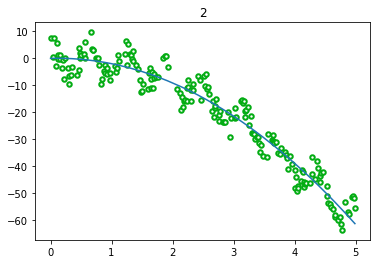

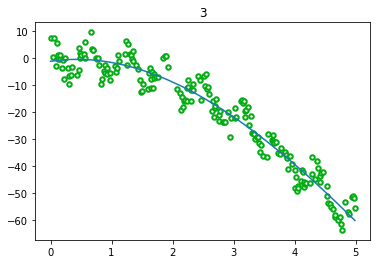

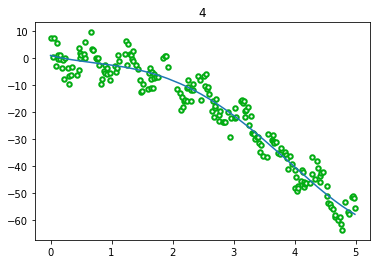

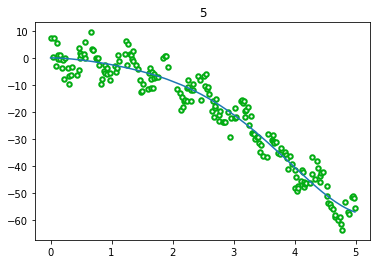

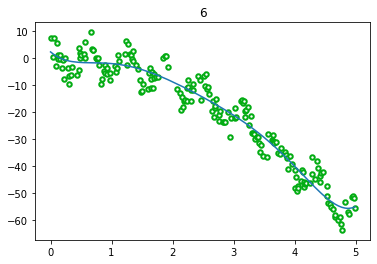

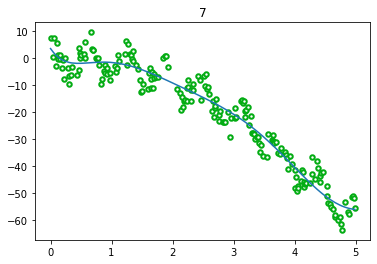

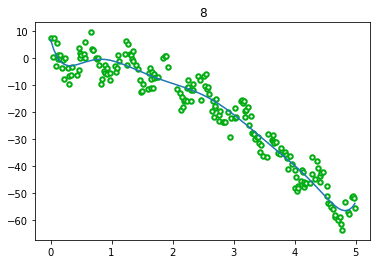

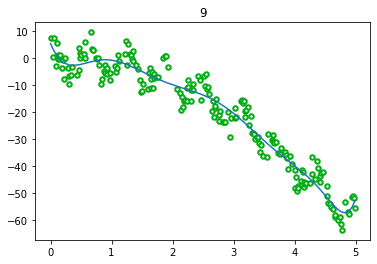

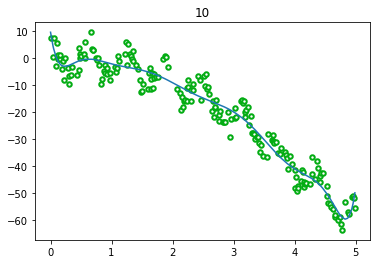

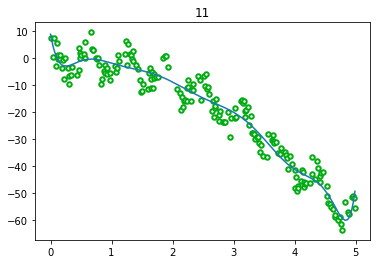

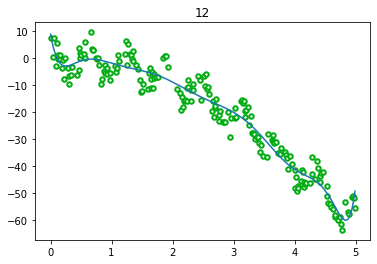

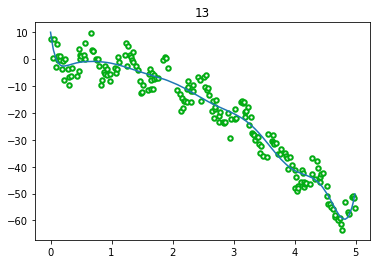

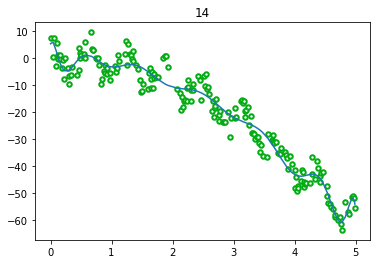

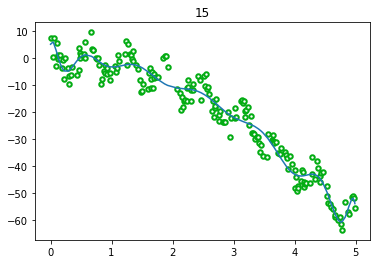

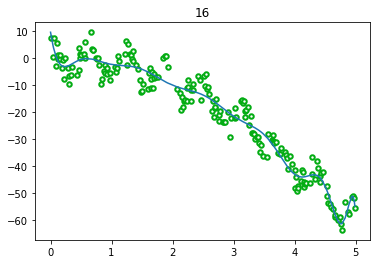

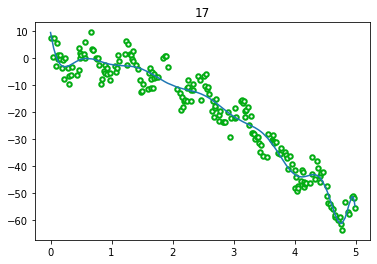

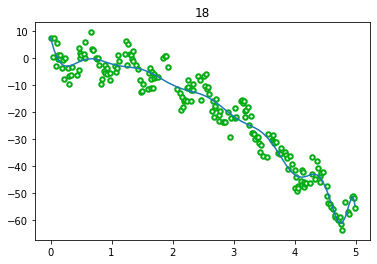

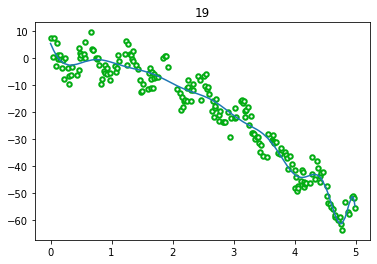

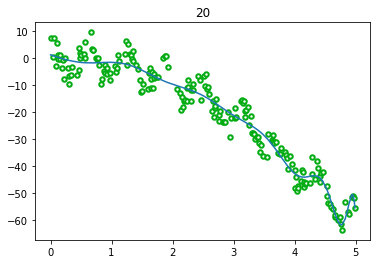

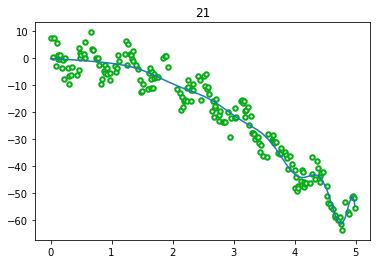

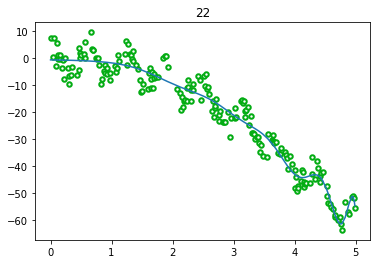

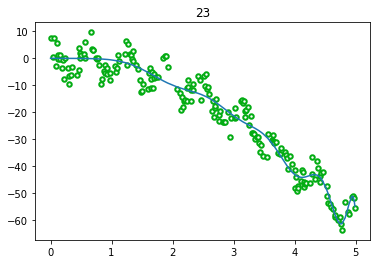

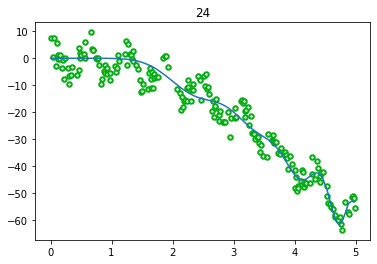

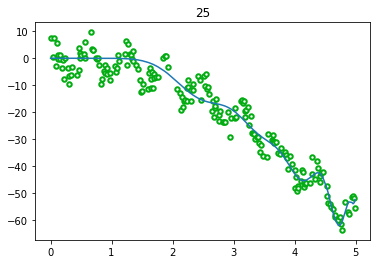

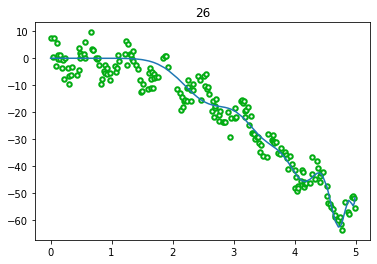

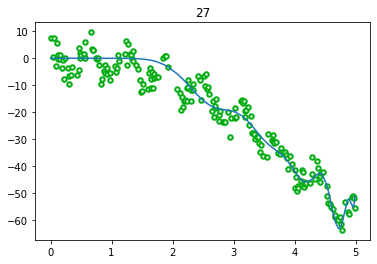

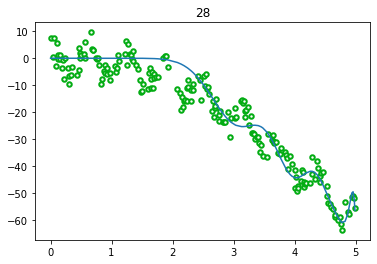

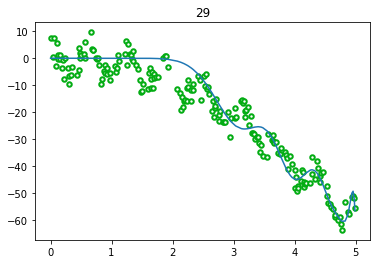

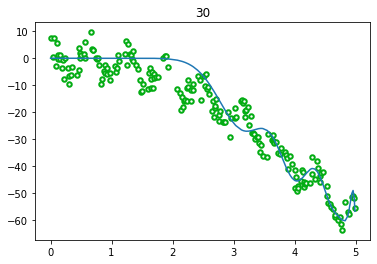

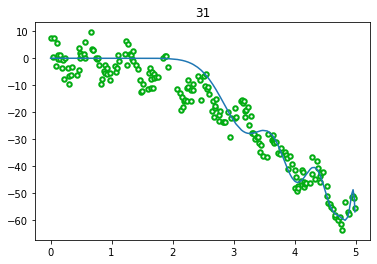

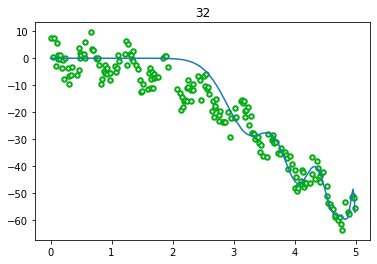

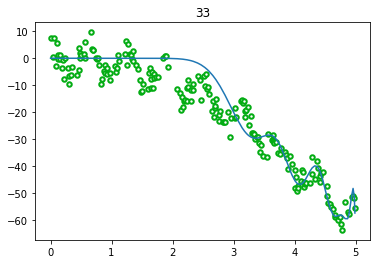

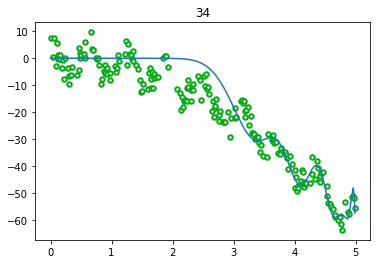

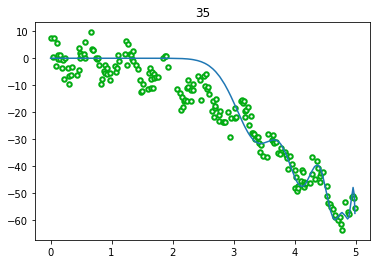

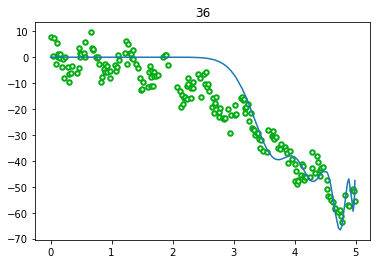

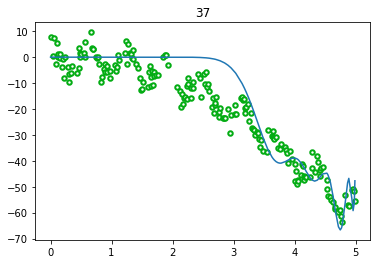

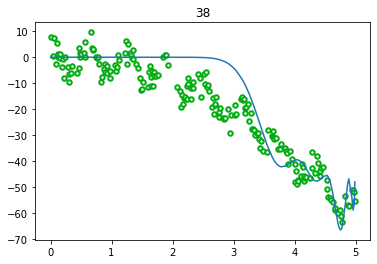

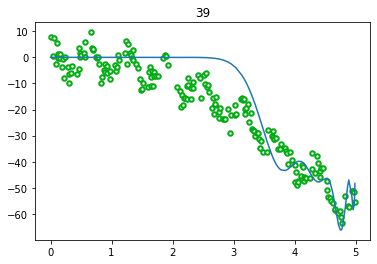

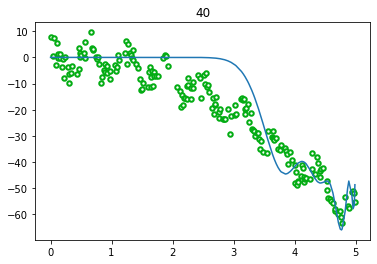

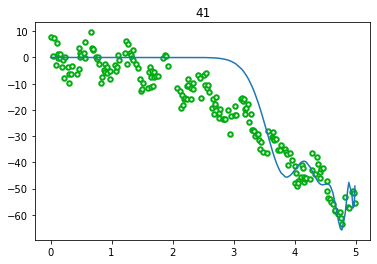

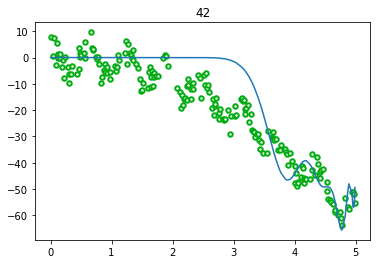

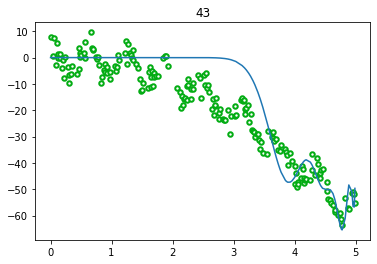

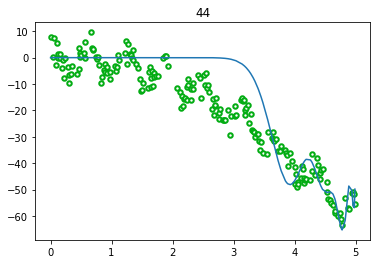

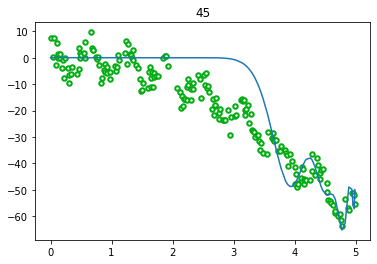

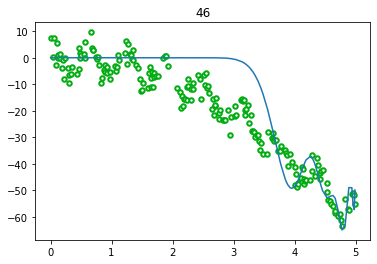

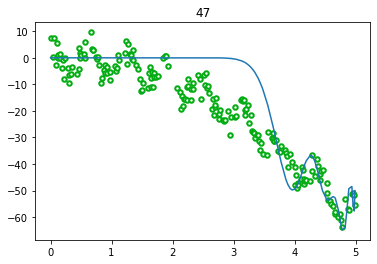

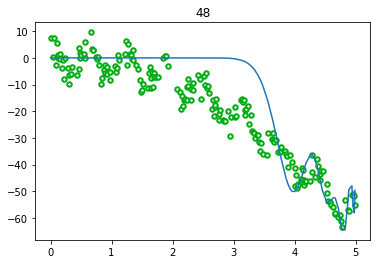

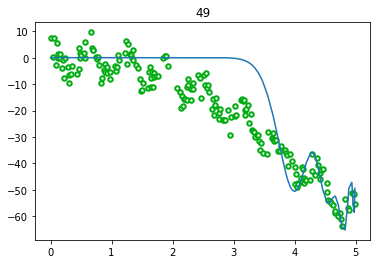

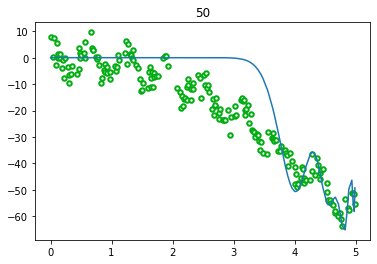

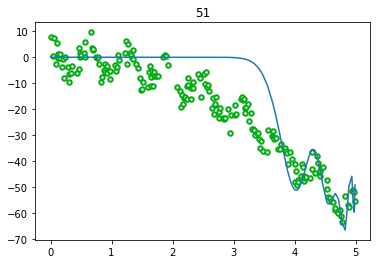

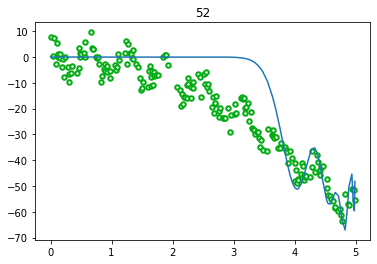

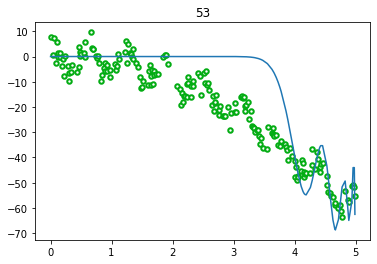

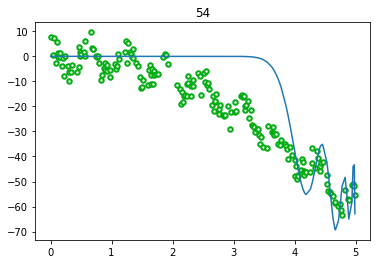

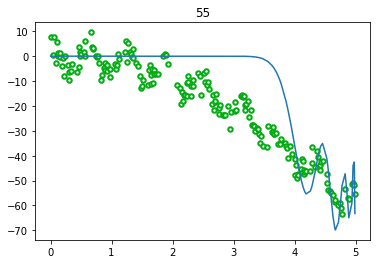

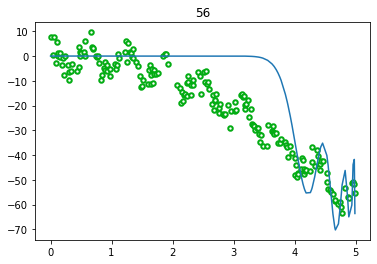

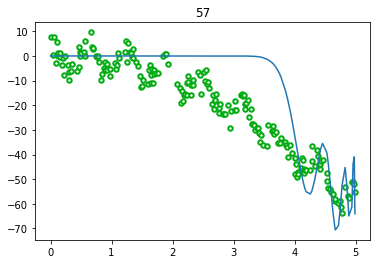

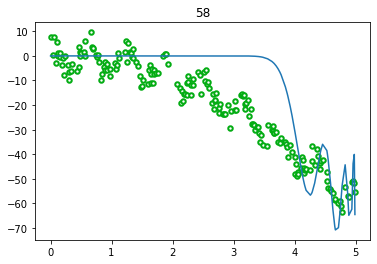

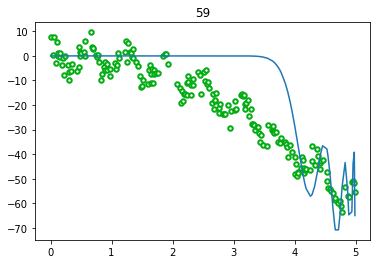

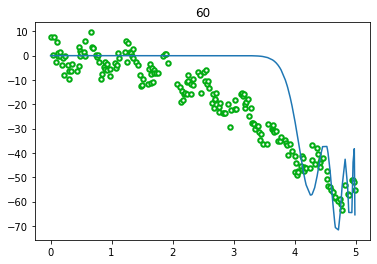

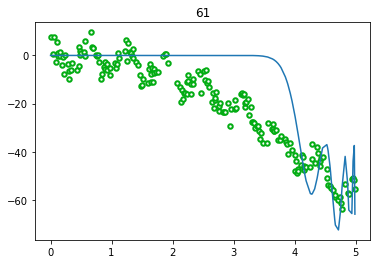

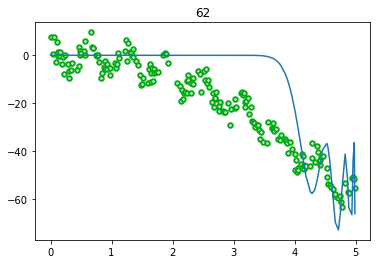

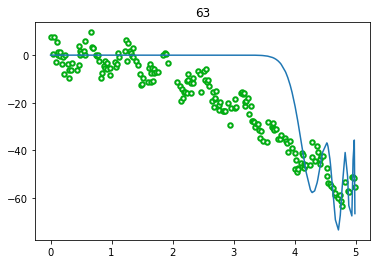

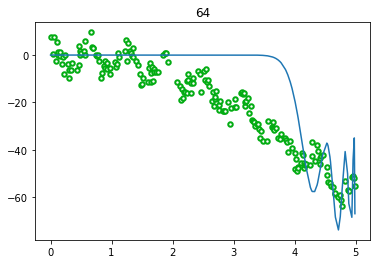

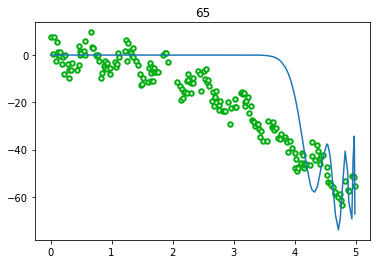

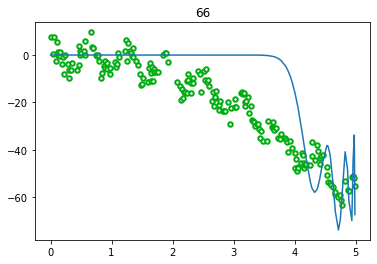

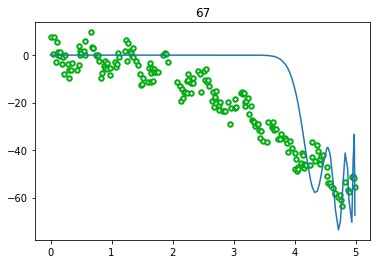

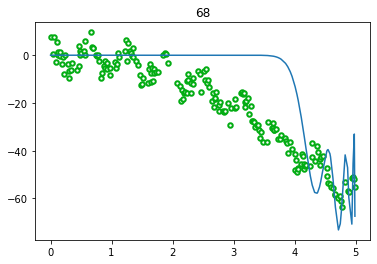

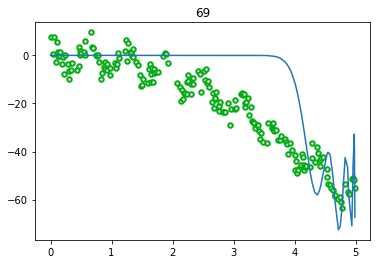

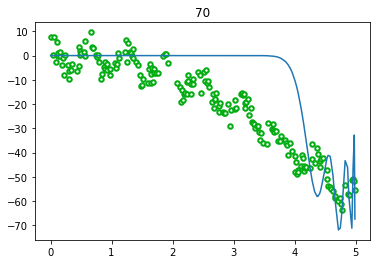

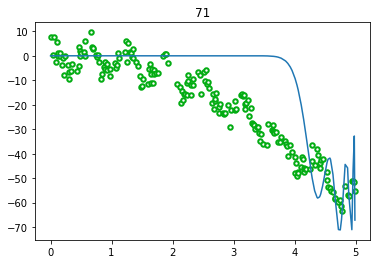

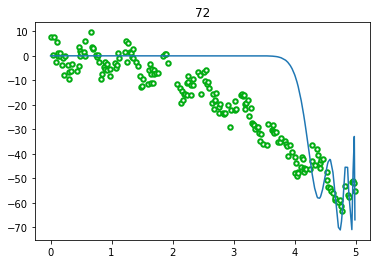

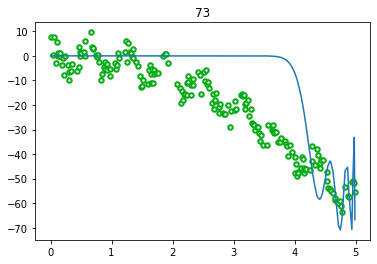

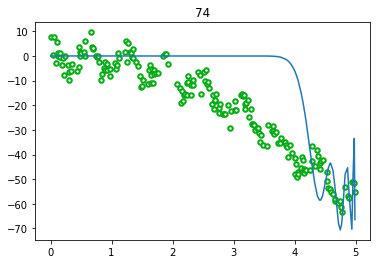

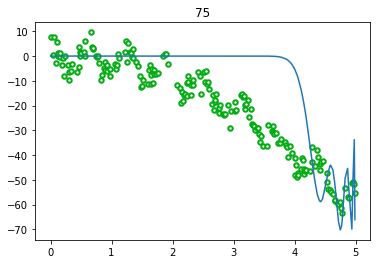

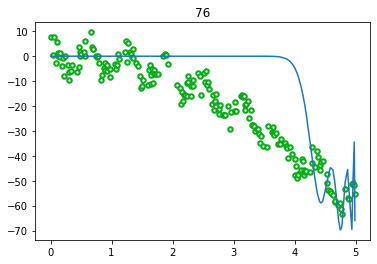

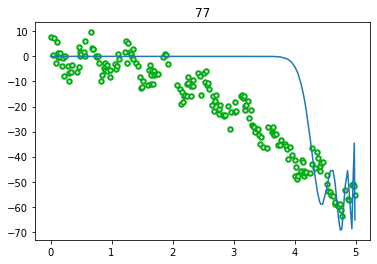

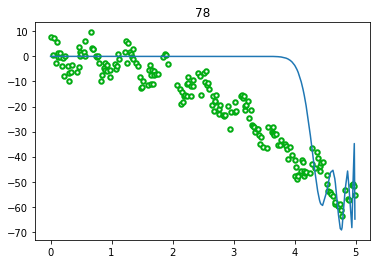

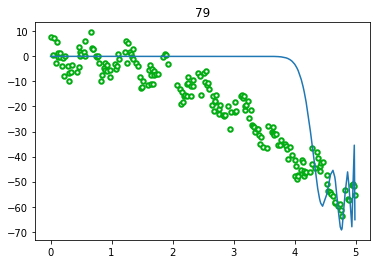

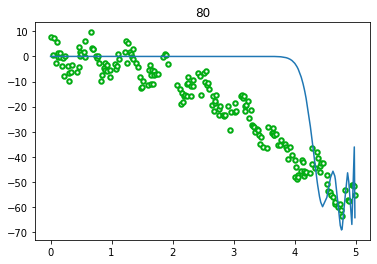

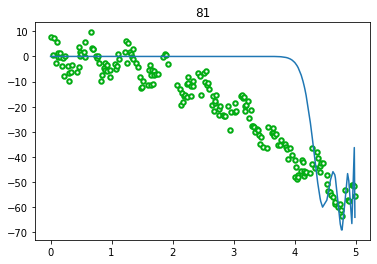

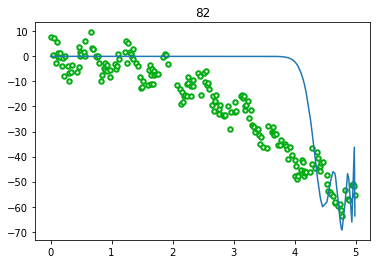

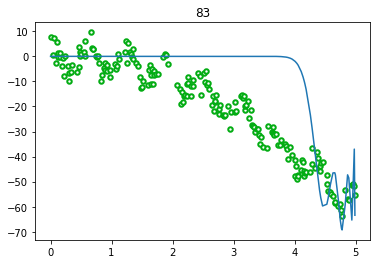

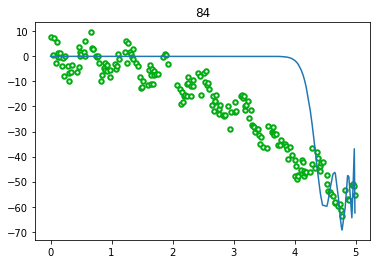

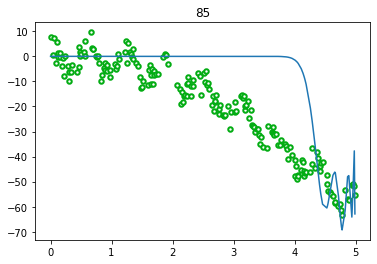

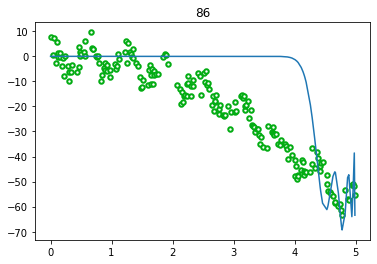

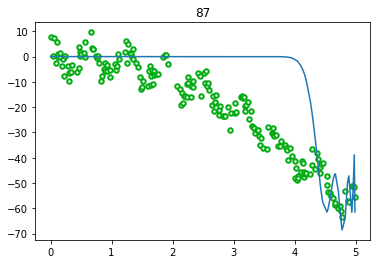

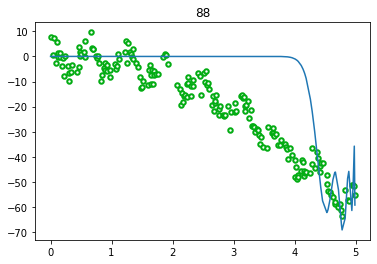

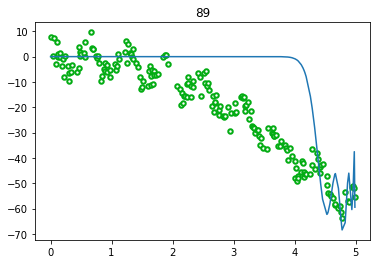

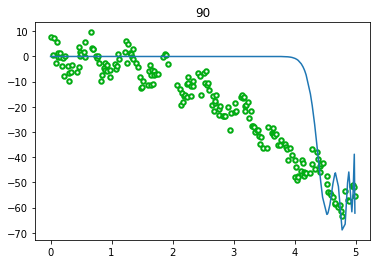

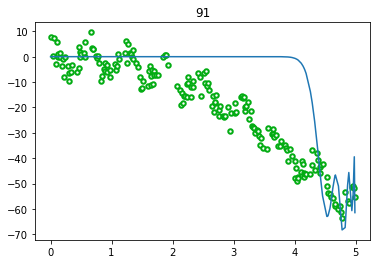

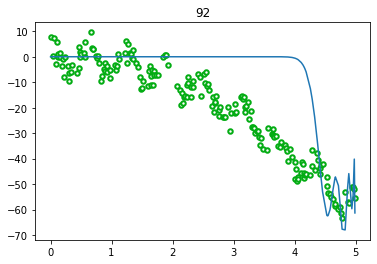

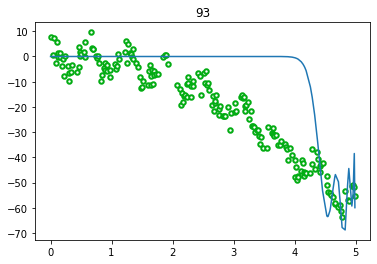

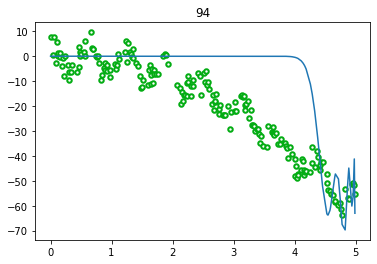

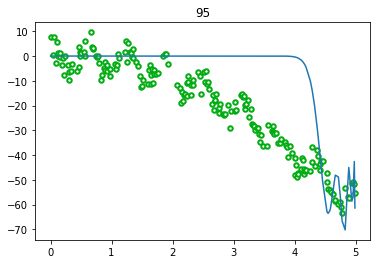

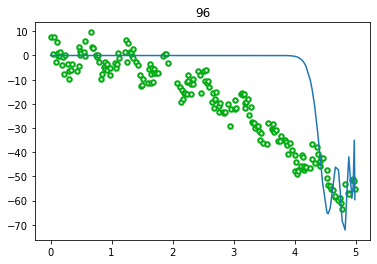

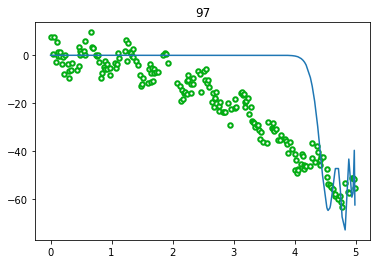

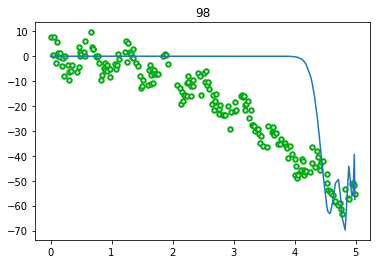

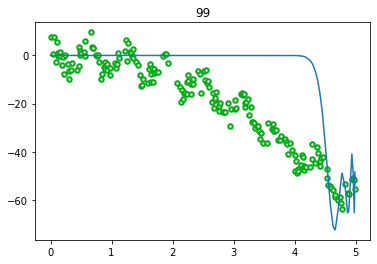

[2, 65.609327739765, 71.56139047842488]
[3, 65.31484055944195, 71.53070372788565]
[4, 64.31785370666174, 70.7752917368896]
[5, 64.18939572084768, 70.61687903131275]
[6, 63.51701498359304, 71.57248620042674]
[7, 63.34175827149222, 71.27076479275058]
[8, 62.24115323707412, 70.16754490376483]
[9, 62.00849663896943, 70.47542733691195]
[10, 60.12313131312164, 69.36815075802618]
[11, 60.051451069050394, 69.1702535106938]
[12, 60.05144660805183, 69.16885484792081]
[13, 59.852805615751784, 69.64533410371435]
[14, 56.44548185293514, 68.28799711457422]
[15, 56.438162767447224, 68.28847097686547]
[16, 57.27314544359864, 68.68073476940368]
[17, 57.26361222084338, 68.75438179622752]
[18, 57.553971436995276, 68.89136344547448]
[19, 58.08297455554103, 69.02009752342202]
[20, 58.87736714351597, 69.76705502618692]
[21, 59.04549726778351, 69.53319704739306]
[22, 59.03391849963626, 69.458185538758]
[23, 59.510111606618885, 69.94891263785112]
[24, 61.402854473051676, 71.27753828560776]
[25, 62.45649369120

In [5]:
#leastSquared linear regression for 1d data after normalisation.
#log normalisation was bad gave best result at degree 33, train error :  52.29, dev Error : 64.65
# Scaling using min and max values, best at degree 87 dev error : 53.19, train error:36.17, 
# scaling train and dev error at 36 are 38.29 and 53.45
# Z score normalisation is terrible

frobVals = []
normTrainData_1d = []
normDevData_1d = []

for [elem] in trainData_1d[0]:
    normTrainData_1d.append(elem)
    
for [elem] in devData_1d[0]:
    normDevData_1d.append(elem)

#sacling code
#trainMin_1d = np.min(normTrainData_1d)
#trainDenom = np.max(normTrainData_1d)-trainMin_1d

#devMin_1d = np.min(normDevData_1d)
#devDenom = np.max(normDevData_1d)-devMin_1d

#fun1 = lambda t: (t-trainMin_1d)/trainDenom
#fun2 = lambda t: (t-devMin_1d)/devDenom

#Z score normalisation
#meanTrainData = np.mean(normTrainData_1d)
#stdTrainData = np.std(normTrainData_1d)

#meanDevData = np.mean(normDevData_1d)
#stdDevData = np.std(normDevData_1d)

#fun1 = lambda t: (t-meanTrainData)/stdTrainData
#fun2 = lambda t: (t-meanDevData)/stdDevData

#trainFunc = np.vectorize(fun1)
#devFunc = np.vectorize(fun2)

#normTrainData_1d = trainFunc(normTrainData_1d)
#normDevData_1d = devFunc(normDevData_1d)

for basisPolDegree in range(2, 100):
    x = []
    for elem in normTrainData_1d:
        rowData = []
        power = 0 
        prod = 1
        while (power<=basisPolDegree):
            rowData.append(prod)
            prod = prod*elem
            power+=1
        x.append(np.array(rowData))
    x = np.array(x)
    w = np.linalg.pinv(x)@(np.array(trainData_1d[1]))
    calcVals = x@w
    
    y = []
    for elem in normDevData_1d:
        rowData = []
        power = 0 
        prod = 1
        while (power<=basisPolDegree):
            rowData.append(prod)
            prod = prod*elem
            power+=1
        y.append(np.array(rowData))
    y = np.array(y)
    calcVals_dev = y@w
    
    tempFrobVal_train = np.linalg.norm((np.array(trainData_1d[1])-calcVals))
    tempFrobVal_dev = np.linalg.norm((np.array(devData_1d[1])-calcVals_dev))
    
    frobVals.append([basisPolDegree, tempFrobVal_train, tempFrobVal_dev])
    plt.plot(normTrainData_1d, calcVals)
    plt.title(str(basisPolDegree))
    plt.scatter(normTrainData_1d, trainData_1d[1], c="white", linewidths=2, edgecolor="#03AC13", s=20)
    plt.show()
    plt.close()

for elem in frobVals:
    print(elem)

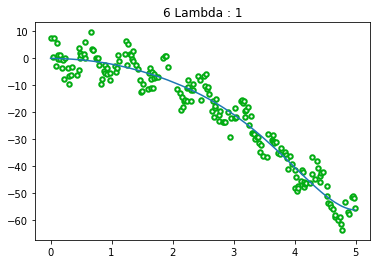

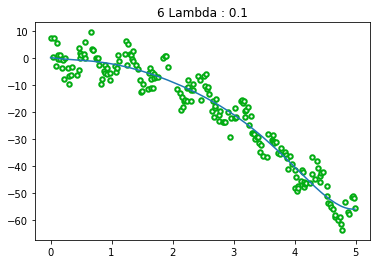

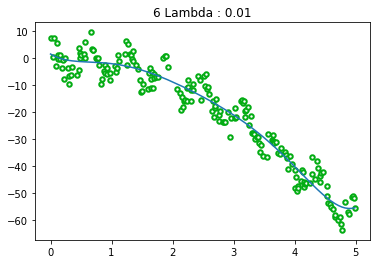

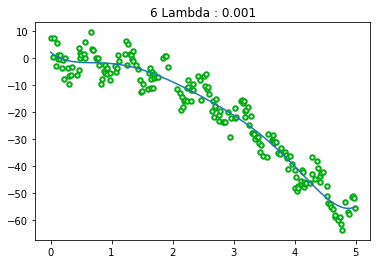

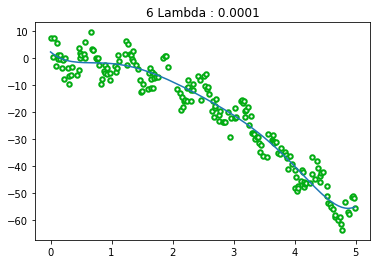

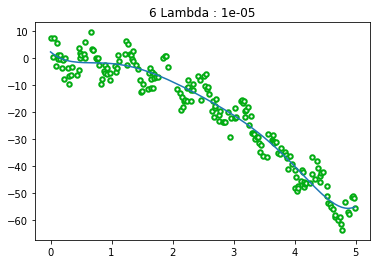

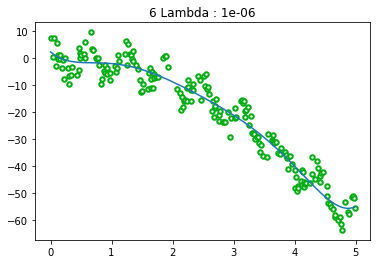

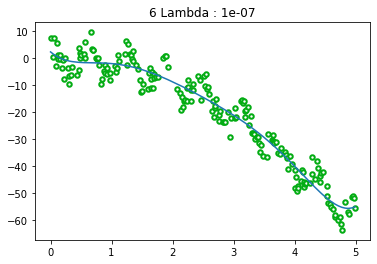

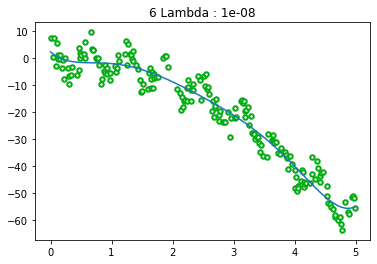

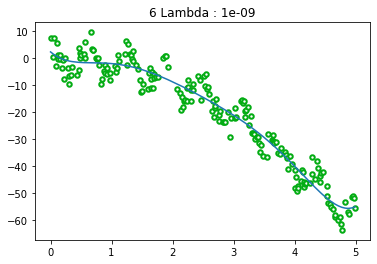

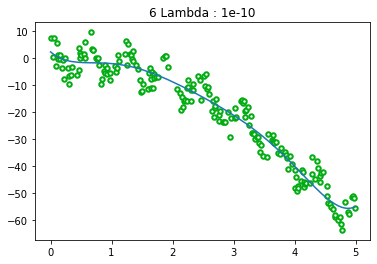

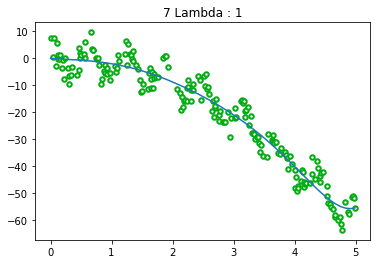

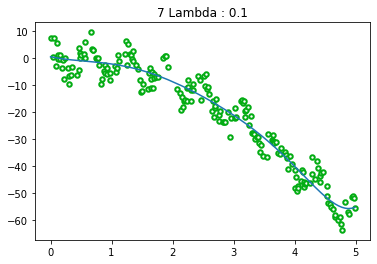

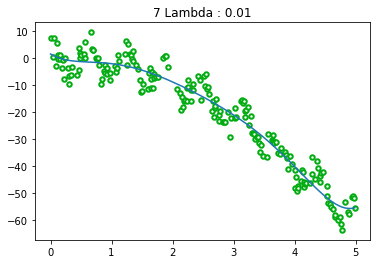

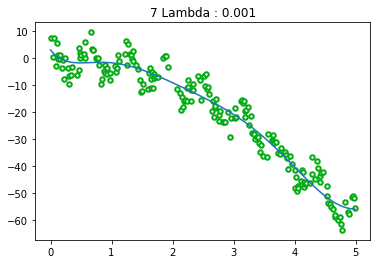

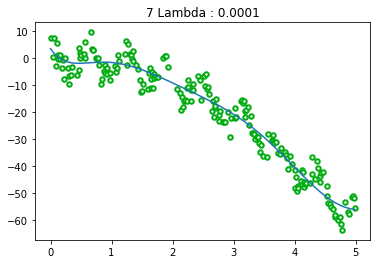

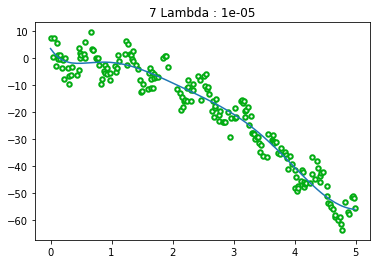

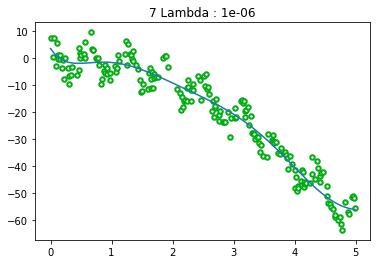

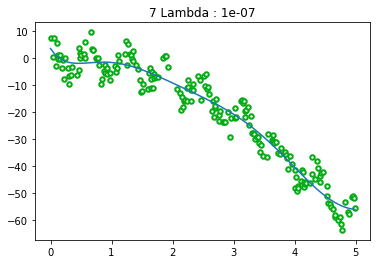

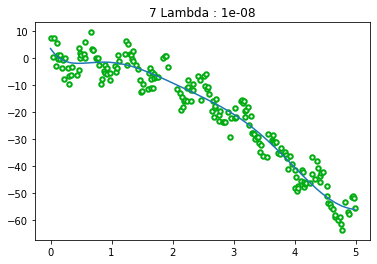

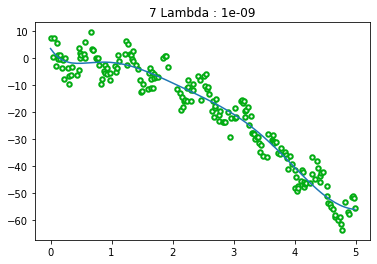

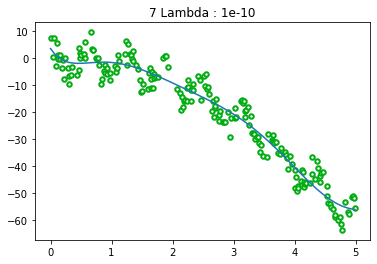

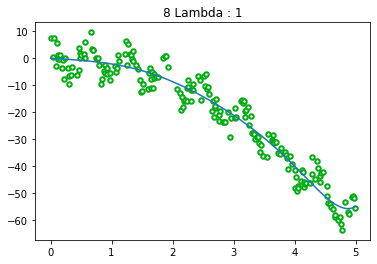

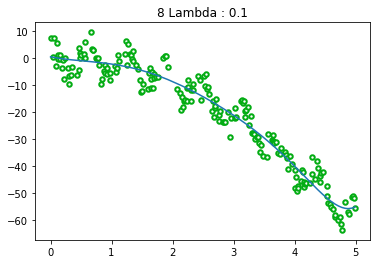

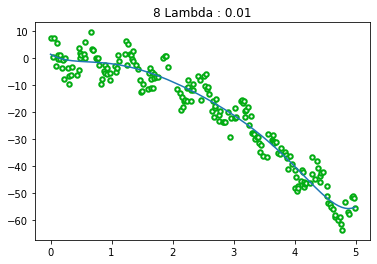

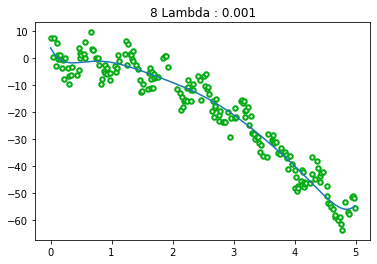

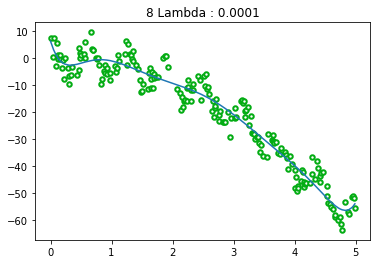

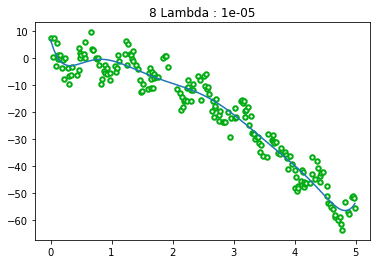

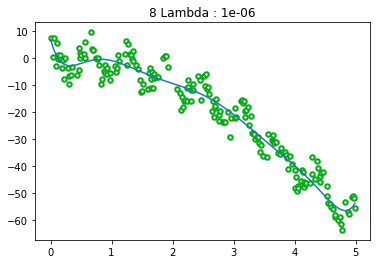

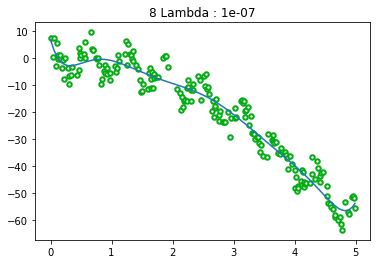

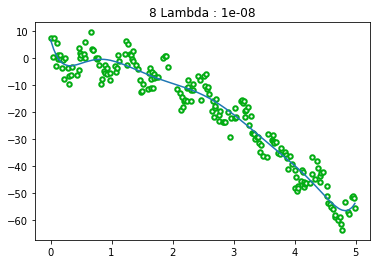

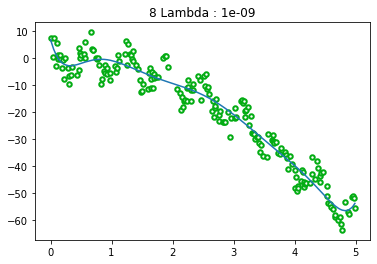

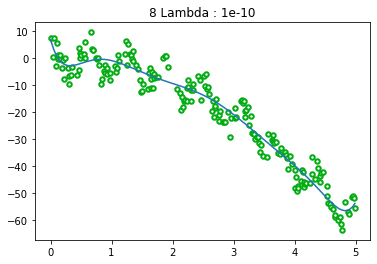

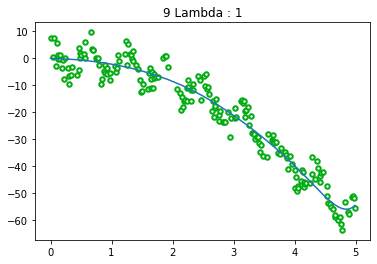

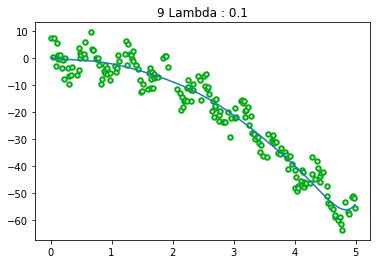

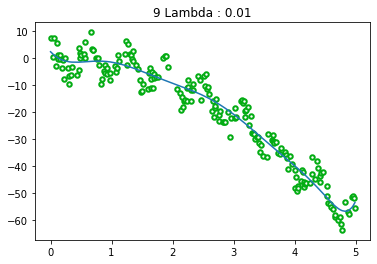

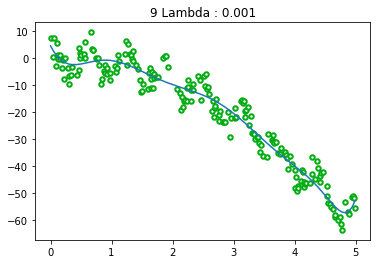

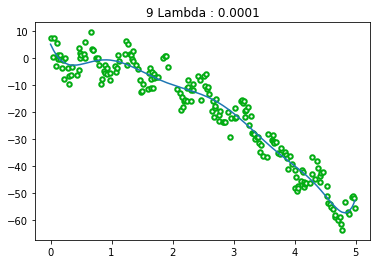

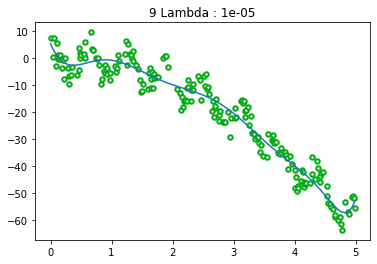

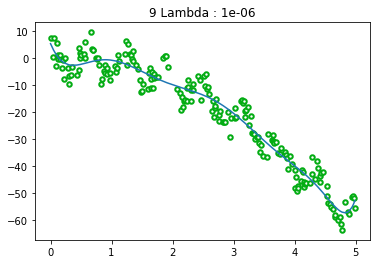

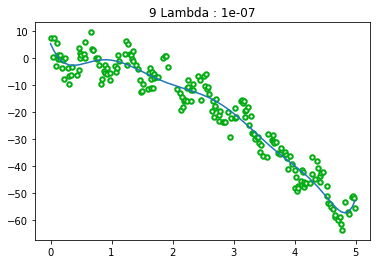

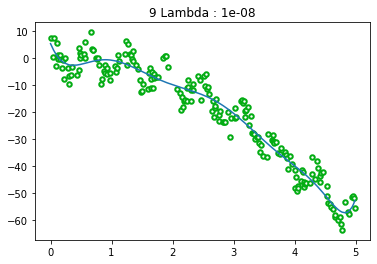

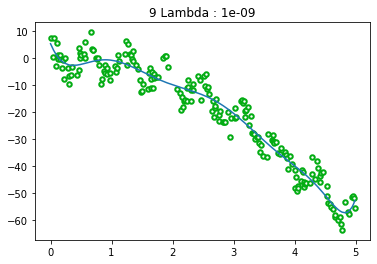

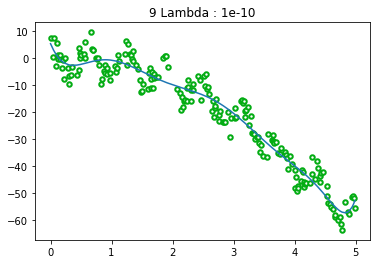

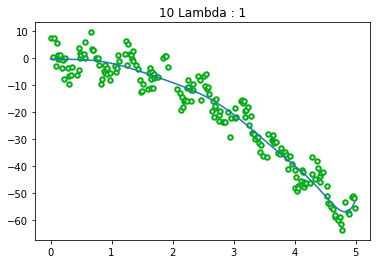

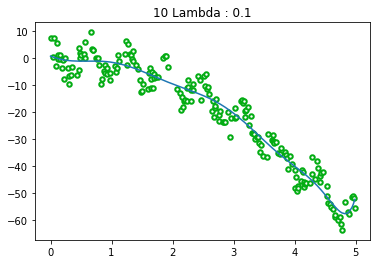

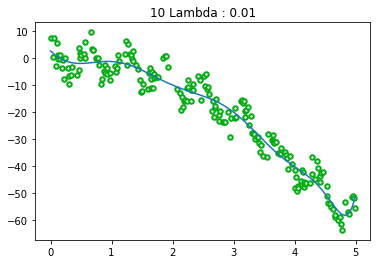

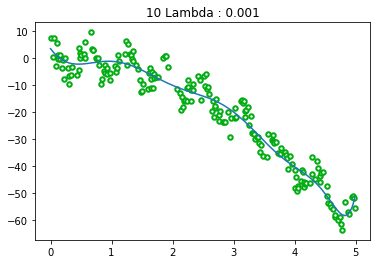

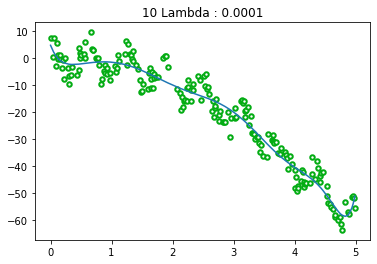

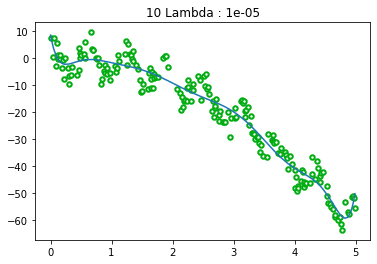

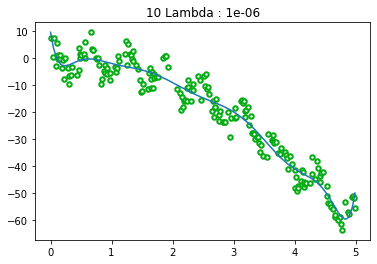

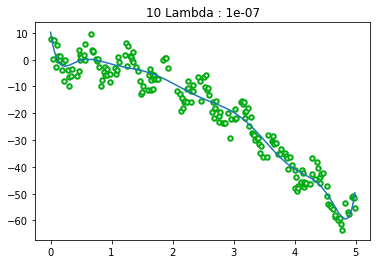

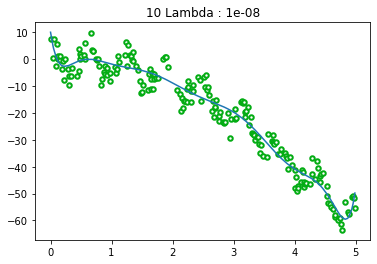

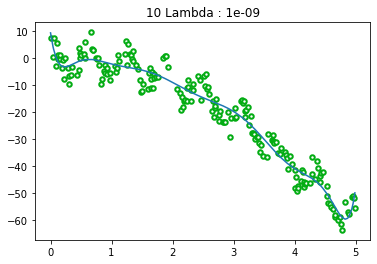

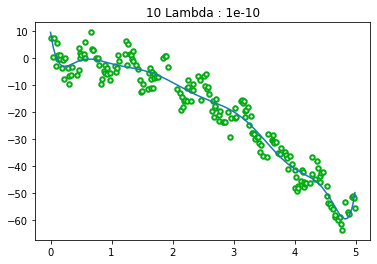

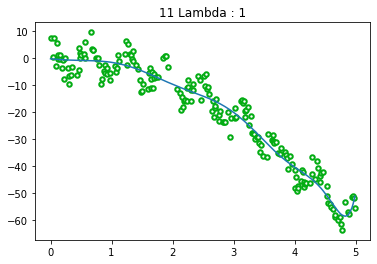

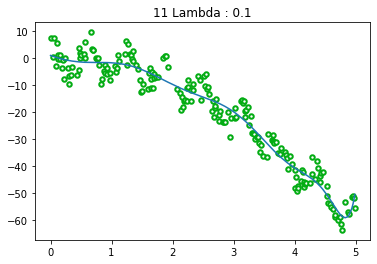

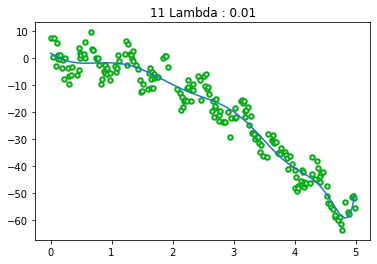

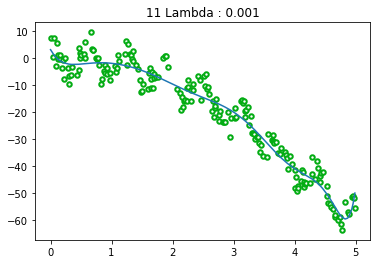

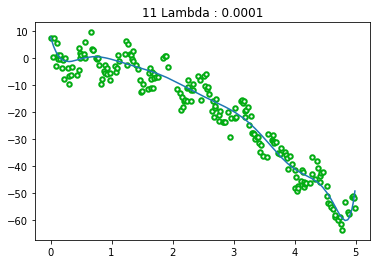

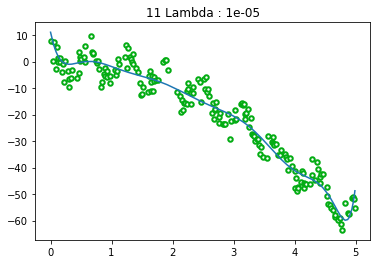

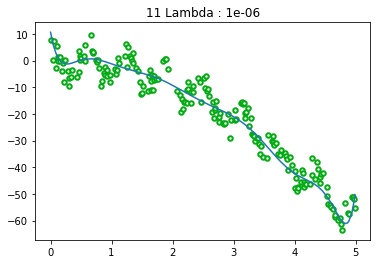

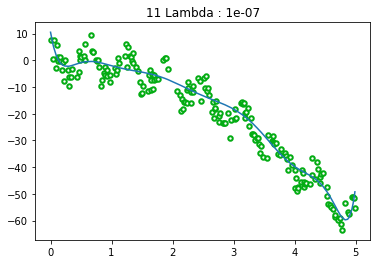

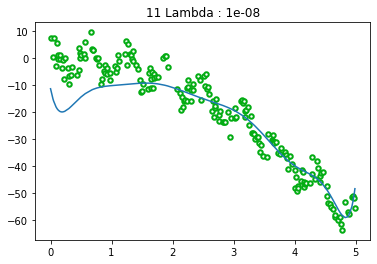

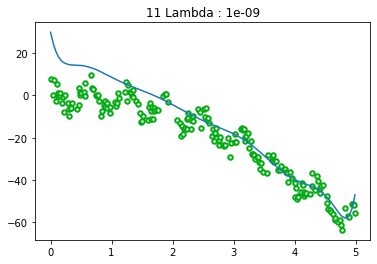

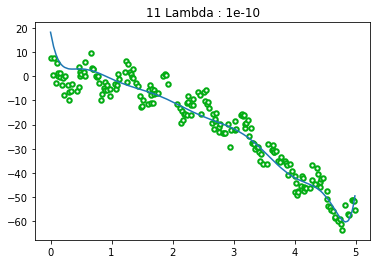

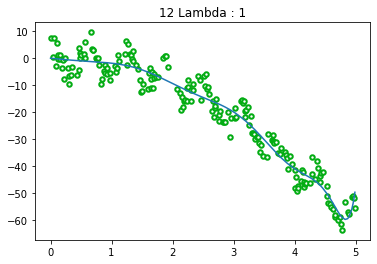

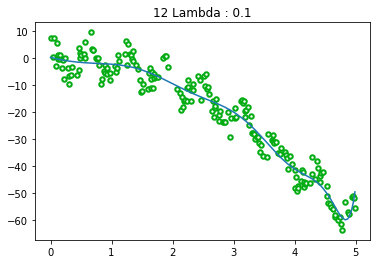

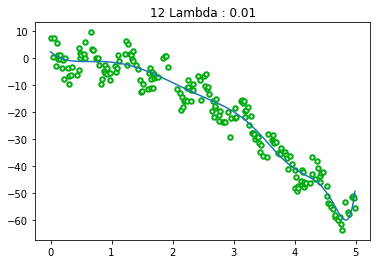

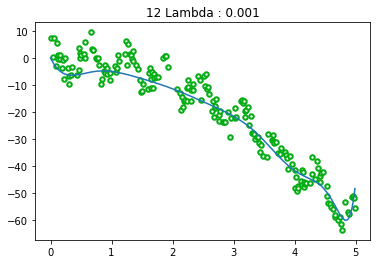

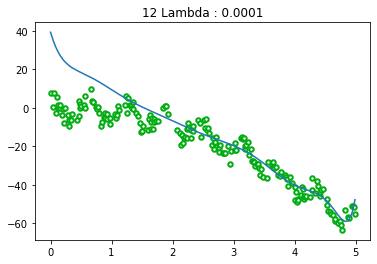

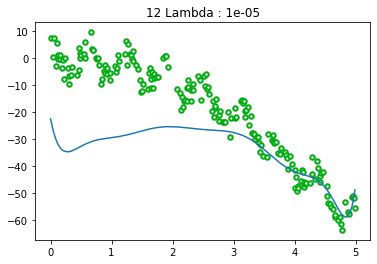

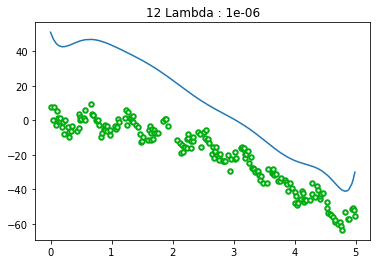

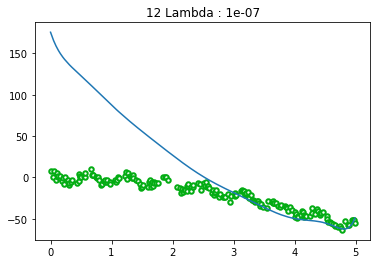

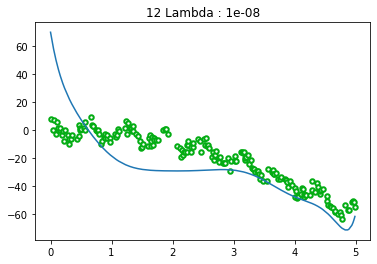

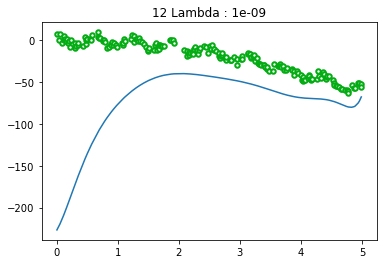

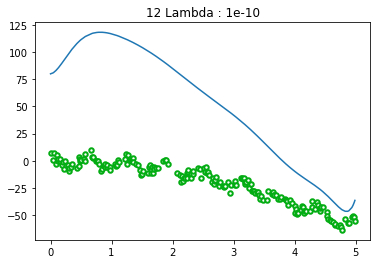

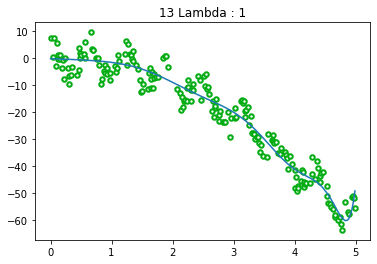

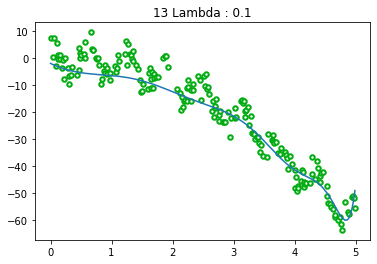

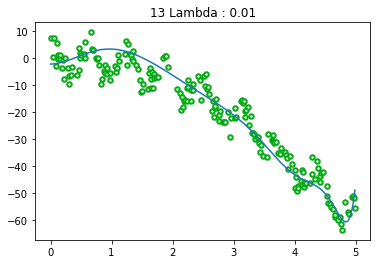

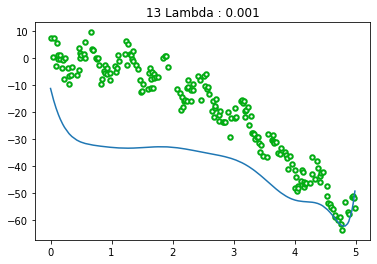

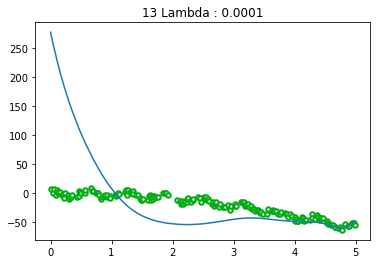

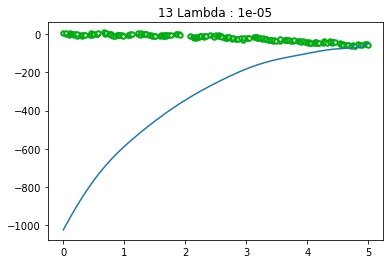

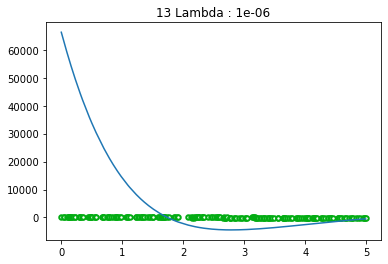

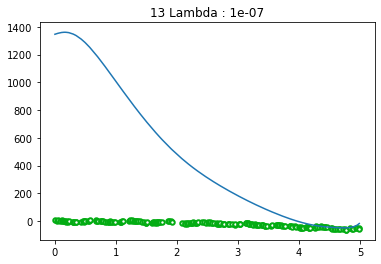

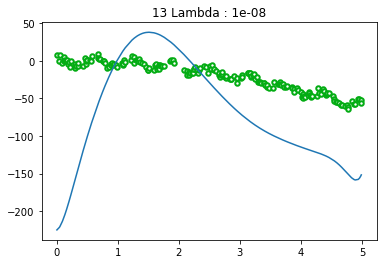

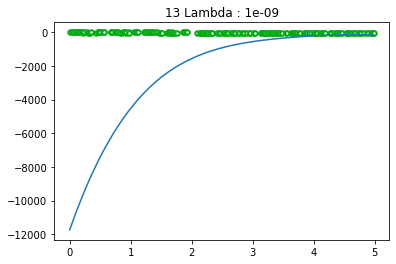

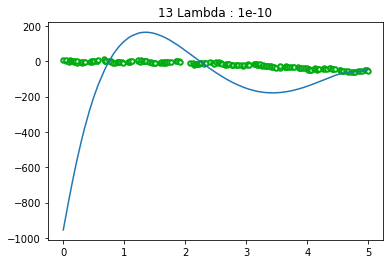

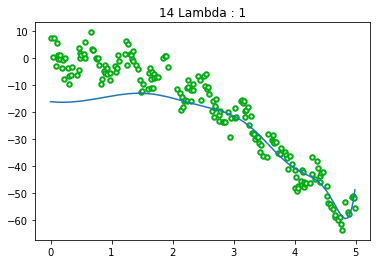

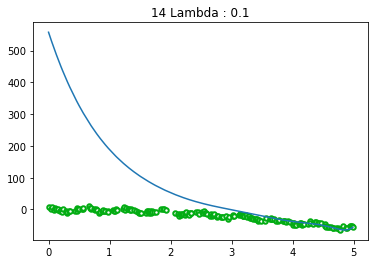

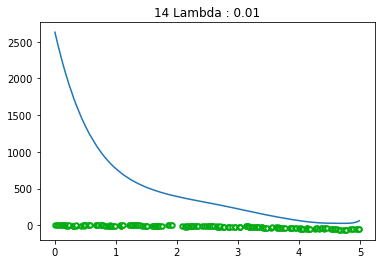

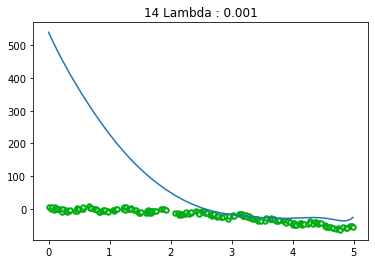

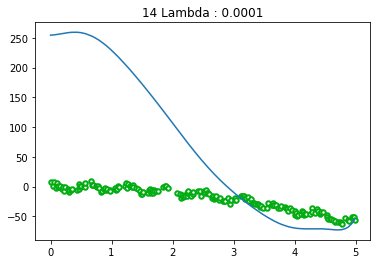

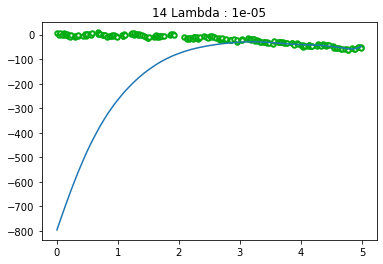

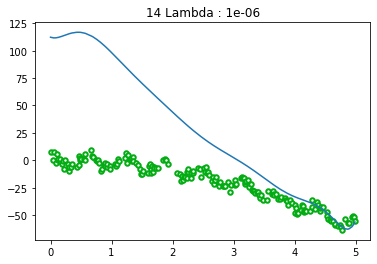

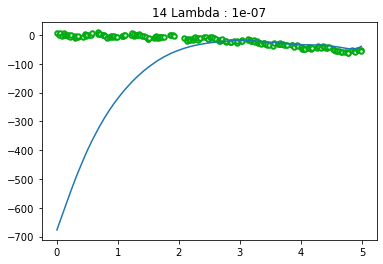

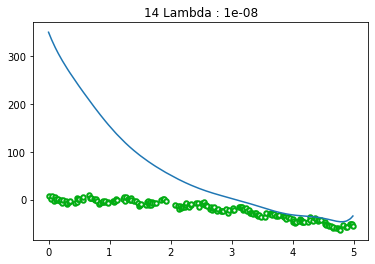

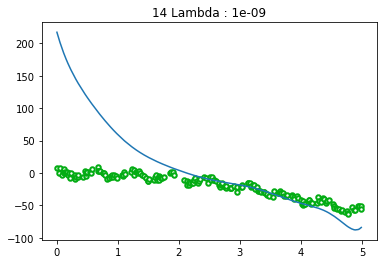

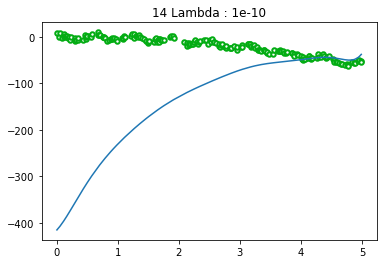

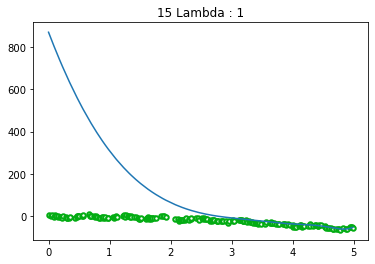

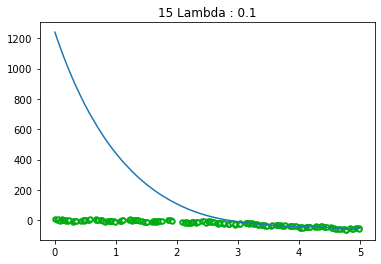

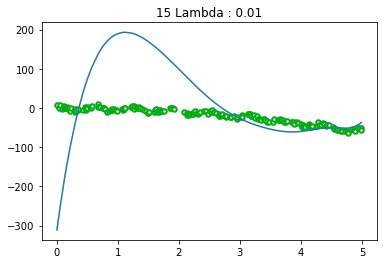

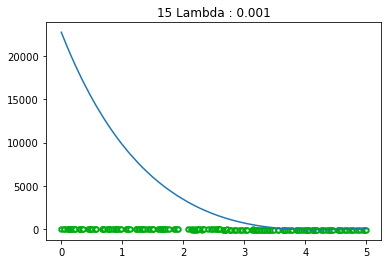

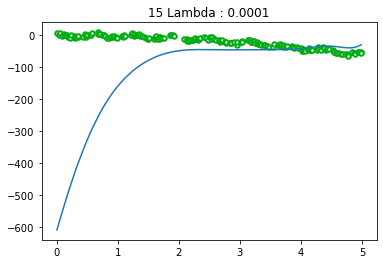

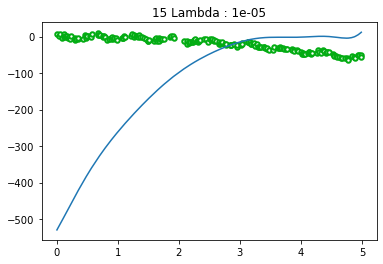

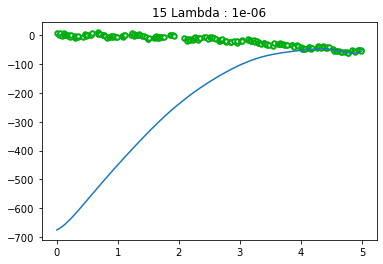

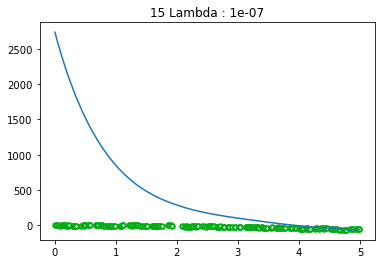

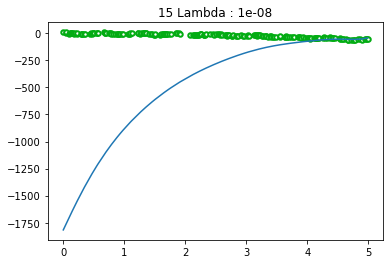

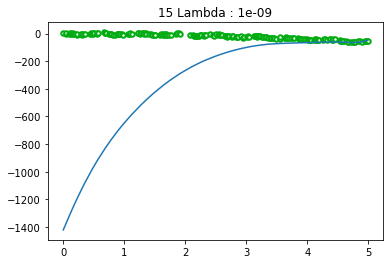

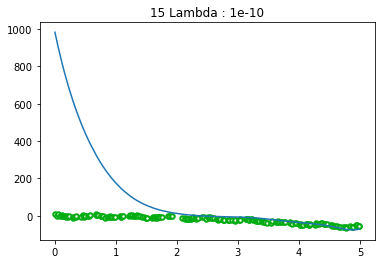

['Degree : 6', 'Lambda Val : 0', 63.98879419002119, 70.71949863827548]
['Degree : 6', 'Lambda Val : 1', 63.83333818735109, 70.84692768351127]
['Degree : 6', 'Lambda Val : 2', 63.559469782876384, 71.24663038979315]
['Degree : 6', 'Lambda Val : 3', 63.51780347038414, 71.52389402723956]
['Degree : 6', 'Lambda Val : 4', 63.51702347296288, 71.56738274916707]
['Degree : 6', 'Lambda Val : 5', 63.51701506912821, 71.57197325046496]
['Degree : 6', 'Lambda Val : 6', 63.51701498444886, 71.57243479630667]
['Degree : 6', 'Lambda Val : 7', 63.51701498360173, 71.57248103934784]
['Degree : 6', 'Lambda Val : 8', 63.517014983593256, 71.57248573109811]
['Degree : 6', 'Lambda Val : 9', 63.51701498359315, 71.57248627034633]
['Degree : 6', 'Lambda Val : 10', 63.517014983593164, 71.57248627870716]
['Degree : 7', 'Lambda Val : 0', 63.85571274432525, 71.0901808973117]
['Degree : 7', 'Lambda Val : 1', 63.76730672071667, 71.24782799574555]
['Degree : 7', 'Lambda Val : 2', 63.56040669668163, 71.2496658537243]
['De

In [6]:
#ridge regression for 1d data
frobVals = []
for basisPolDegree in range(6, 16):
    x = []
    for [elem] in trainData_1d[0]:
        rowData = []
        power = 0 
        prod = 1
        while (power<=basisPolDegree):
            rowData.append(prod)
            prod = prod*elem
            power+=1
        x.append(np.array(rowData))
    x = np.array(x)
    
    y = []
    for [elem] in devData_1d[0]:
        rowData = []
        power = 0 
        prod = 1
        while (power<=basisPolDegree):
            rowData.append(prod)
            prod = prod*elem
            power+=1
        y.append(np.array(rowData))
    y = np.array(y)
    
    for lam in range(11):
        tempMat = (x.T)@x
        w = np.linalg.inv(tempMat + (10**(-1*lam))*np.identity(tempMat.shape[0]))@(x.T)@(np.array(trainData_1d[1]))
        calcVals = x@w
        calcVals_dev = y@w

        tempFrobVal_train = np.linalg.norm((np.array(trainData_1d[1])-calcVals))
        tempFrobVal_dev = np.linalg.norm((np.array(devData_1d[1])-calcVals_dev))

        frobVals.append(["Degree : " + str(basisPolDegree), "Lambda Val : " + str(lam), tempFrobVal_train, tempFrobVal_dev])
        plt.plot(trainData_1d[0], calcVals)
        plt.title(str(basisPolDegree)+ " Lambda : " +str(10** (-1*lam)))
        plt.scatter(trainData_1d[0], trainData_1d[1], c="white", linewidths=2, edgecolor="#03AC13", s=20)
        plt.show()
        plt.close()

for elem in frobVals:
    print(elem)

ValueError: x and y must have same first dimension, but have shapes (25,) and (24,)

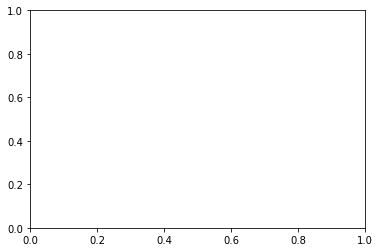

In [7]:
#least squared for 2d data.
frobVals = []
for basisPolDegree in range(1, 25):
    x = []
    for [a, b] in trainData_2d[0]:
        rowData = []
        subPower = 0
        while (subPower <= basisPolDegree):
            power = 0
            while (power<=subPower):
                rowData.append((a**power)*(b**(subPower-power)))
                power+=1
            subPower+=1
        x.append(rowData)
    x = np.array(x)
    w = np.linalg.inv(x.T@x)@x.T@(np.array(trainData_2d[1]))
    calcVals = x@w
    
    y = []
    for [a, b] in devData_2d[0]:
        rowData = []
        subPower = 0
        while (subPower <= basisPolDegree):
            power = 0
            while (power<=subPower):
                rowData.append((a**power)*(b**(subPower-power)))
                power+=1
            subPower+=1
        y.append(rowData)
    y = np.array(y)
    calcVals_dev = y@w
    
    tempFrobVal_train = np.linalg.norm((np.array(trainData_2d[1])-calcVals))
    tempFrobVal_dev = np.linalg.norm((np.array(devData_2d[1])-calcVals_dev))
    frobVals.append(tempFrobVal_dev)
    
plt.plot(range(1,26), frobVals)

In [ ]:
#Ridge regression for 2d data
#least squared for 2d data.
frobVals = []
for basisPolDegree in range(1, 15):
    x = []
    for [a, b] in trainData_2d[0]:
        rowData = []
        subPower = 0
        while (subPower <= basisPolDegree):
            power = 0
            while (power<=subPower):
                rowData.append((a**power)*(b**(subPower-power)))
                power+=1
            subPower+=1
        x.append(rowData)
    x = np.array(x)
    
    y = []
    for [a, b] in devData_2d[0]:
        rowData = []
        subPower = 0
        while (subPower <= basisPolDegree):
            power = 0
            while (power<=subPower):
                rowData.append((a**power)*(b**(subPower-power)))
                power+=1
            subPower+=1
        y.append(rowData)
    y = np.array(y)
    
    for lam in range(10):
        tempMat = (x.T)@x
        w = np.linalg.inv(tempMat + (10**(-1*lam))*np.identity(tempMat.shape[0]))@(x.T)@(np.array(trainData_2d[1]))
        calcVals = x@w
        calcVals_dev = y@w

        tempFrobVal_train = np.linalg.norm((np.array(trainData_2d[1])-calcVals))
        tempFrobVal_dev = np.linalg.norm((np.array(devData_2d[1])-calcVals_dev))
        frobVals.append(["Degree : " + str(basisPolDegree), "Lambda Val : " + str(lam), tempFrobVal_train, tempFrobVal_dev])
    
for elem in frobVals:
    print(elem)

In [ ]:
x = []
for [a, b] in trainData_2d[0]:
    rowData = []
    subPower = 0
    while (subPower <= 10):
        power = 0
        while (power<=subPower):
            rowData.append((a**power)*(b**(subPower-power)))
            power+=1
        subPower+=1
    x.append(rowData)
x = np.array(x)
w = np.linalg.pinv(x)@(np.array(trainData_2d[1]))

def genPhi(x, degree)

def getval(x,y,w_ml,degree):
	n = len(x)
	z = []
	for i in range(n):
		m = len(x[i])
		temp = []
		for j in range(m):
			tt = []
			qq = []
			qq.append(x[i][j])
			qq.append(y[i][j])
			tt.append(qq)
			phi,count = genPhi(tt,degree)
			# print(phi)
			temp.append(np.dot(phi[0,:],w_ml))
		z.append(temp)

	return np.array(z)

fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
x = np.outer(np.linspace(-1, 1, 50), np.ones(50))
y = x.copy().T
ax.plot_surface(x,y,getval(x,y,w,15),alpha = 0.5)
plt.title("Plot on test data")
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_zlim((min(devData_2d[1])-1.0,max(devData_2d[1])+1.0))

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Thu Mar  3 21:03:55 2022

@author: jayak
"""

#include necessary modules
import numpy as np
import math
from matplotlib import pyplot as plt

#This function fetches data from txtfiles and returns them as a list of lists
def getData(fileName):
    params = []
    target = []
    with open(fileName, 'r') as dataFile:
        dataLines = dataFile.readlines()

    for dataLine in dataLines:
        tempData = dataLine.split(' ')
        data = []
        dataLineCount = len(tempData)
        val = dataLineCount-1
        for i in range(val):
            data.append(float(tempData[i]))
        params.append(data)
        target.append(float(tempData[dataLineCount-1].strip('\n')))
    return [params, target] #print(data)

def fillMatrix(xIn, degree):
    x = []
    for [a, b] in xIn:
        rowData = []
        subPower = 0
        while (subPower <= degree):
            power = 0
            while (power<=subPower):
                rowData.append((a**power)*(b**(subPower-power)))
                power+=1
            subPower+=1
        x.append(rowData)
    return np.array(x)



#This Function computes the RMSE when a Least squared error linear regression model of basis polynomial degree 15 is used for the data.
def lse(trainData_2d, devData_2d):
    X = fillMatrix(trainData_2d[0], 11)
    Y = fillMatrix(devData_2d[0], 11)
    W = np.linalg.pinv(X)@(np.array(trainData_2d[1]))
    calcVals = Y@W
    print(np.linalg.norm(devData_2d[1]-calcVals))
    print("RMSE LSR : " + str(np.linalg.norm(devData_2d[1]-calcVals)/math.sqrt(X.shape[0])))

#This Function computes the RMSE when a Ridge regression model of basis polynomial degree 10 is used for the data with lamda 0.91*10^(-5).
def ridge(trainData_2d, devData_2d):
    X = fillMatrix(trainData_2d[0], 10)
    Y = fillMatrix(devData_2d[0], 10)
    tempMat = (X.T)@X
    W = np.linalg.inv(tempMat + (0.91 * (10**(-5)))*np.identity(tempMat.shape[0]))@(X.T)@(np.array(trainData_2d[1]))
    calcVals = Y@W
    print("RMSE RIDGE : " + str(np.linalg.norm(devData_2d[1]-calcVals)/math.sqrt(X.shape[0])))
 


def main():
    trainData_2d = getData('2d_team_36_train.txt') #Reading In the input data
    devData_2d = getData('2d_team_36_dev.txt') #Reading In the test data
    lse(trainData_2d, devData_2d)   #calling LSE Linear Regression function
    ridge(trainData_2d, devData_2d) #calling Ridge Regression Function
    
main()